## Get URL link by using webdriver

In [1]:
#Get link on the search page
from selenium import webdriver
import undetected_chromedriver as uc

driver = uc.Chrome(use_subprocess=True)
driver.get('https://www.hipflat.co.th/en/search/sale/condo_y/TH.BM_r1/any_r2/any_p/any_b/any_a/any_w/100.6244261045141,13.77183154691727_c/12_z/list_v')

In [5]:
from selenium.webdriver.common.by import By
import time

link_lists = []
for x in range(33):
    list_data = driver.find_elements("xpath","//div[@class='listing-title']/h1/a")
    for my_elem in list_data:
        link_lists.append(my_elem.get_attribute("href")) 
    if x != 33:
        try:
            driver.find_element("xpath",'//div[@class="pagination-btn__right"]/a').click()
            time.sleep(1)
        except:
            break

In [6]:
lists = link_lists

In [8]:
len(lists)

990

## Web crawl data 

In [9]:
#Get data from each page
import pandas as pd
import numpy as np
from selenium.webdriver.common.by import By

data = []
for link in lists:
    list_data = []
    driver.get(link)
    
    #Get all elements
    webEleList = driver.find_element("xpath",'.//*')

    #Title
    try:
        title = webEleList.find_element("xpath",'//div[@class="project-header-title"]/div[@class="project-header-name"]')
        list_data.append(title.text)
    except:
        list_data.append(" ")
        
    #Year_built
    try:
        year_built = webEleList.find_element("xpath",'//li[@class="project-header-year"]/div[@class="text-wrapper"]/span')
        list_data.append(int(year_built.text)) 
    except:
        list_data.append(" ")
        
    #No_floor
    try:
        no_floor = webEleList.find_element("xpath",'//li[@class="project-header-floor"]/div[@class="text-wrapper"]/span')
        list_data.append(int(no_floor.text)) 
    except:
        list_data.append(" ")
        
    #Nearest_bts
    #Nearest_mrt
    #Dist_bts
    #Dist_mrt
    BTS_lists = ['Khu Khot','Yaek Kor Por Aor','Royal Thai Air Force Museum','Bhumibol Adulyadej Hospital','Saphan Mai','Sai Yud','Phahon Yothin 59','Wat Phra Sri Mahathat',
                '11th Infantry Regiment','Bang Bua','Royal Forest Department','Kasetsart University','Sena Nikhom','Ratchayothin','Phahon Yothin 24','Ha Yaek Lat Phrao','Mo Chit',
                 'Saphan Khwai','Sena Ruam','Ari','Sanam Pao','Victory Monument','Phaya Thai','Ratchathewi','Siam','Chit Lom','Phloen Chit','Nana,Asok','Phrom Phong','Thong Lo','Ekkamai',
                 'Phra Khanong','On Nut','Bang Chak','Punnawithi','Udom Suk','Bang Na','Bearing','Samrong,Pu Chao','Chang Erawan','Royal Thai Naval Academy','Pak Nam','Srinagarindra',
                 'Phraek Sa','Sai Luat','Kheha']
    MRT_lists = ['Tha Phra','Charan 13','Fai Chai','Bang Khun Non','Bang Yi Khan','Sirindhorn','Bang Phlat','Bang O','Bang Pho','Tao Poon',
                 'Bang Sue','Kamphaeng Phet','Chatuchak Park','Phahon Yothin','Lat Phrao','Ratchadaphisek','Sutthisan','Huai Khwang','Thailand Cultural Centre',
                 'Phra Ram 9','Phetchaburi','Sukhumvit','Queen Sirikit National Convention Centre','Khlong Toei','Lumphini','Si Lom,Sam Yan',
                 'Hua Lamphong','Wat Mangkon','Sam Yot','Sanam Chai','Itsaraphap','Tha Phra','Bang Phai','Bang Wa','Phetkasem 48','Phasi Charoen','Bang Khae','Lak Song']
    try:
        dists = webEleList.find_elements(By.CLASS_NAME,"media-body")
        check_bts = 0
        check_mrt = 0
        for dist in dists:
            list = dist.text.split("\n")
            #Check whether it is BTS or MRT
            if list[0] in BTS_lists and check_bts == 0:
                list_data.append(list[0]) 
                txt = list[1].split(" ")
                list_data.append(float(txt[0])) 
                check_bts = 1  
            elif list[0] in MRT_lists and check_mrt == 0:
                list_data.append(list[0]) 
                txt = list[1].split(" ")
                list_data.append(float(txt[0])) 
                check_mrt = 1
            elif check_bts == 1 and check_mrt == 1:
                break
    
        #No BTS or MRT
        if check_bts == 0:
            list_data.append(" ")
            list_data.append(" ")
        if check_mrt == 0:
            list_data.append(" ")
            list_data.append(" ")
    except:
        list_data.append(" ")  
        list_data.append(" ") 
        list_data.append(" ") 
        list_data.append(" ") 
    
    try:    
        #Price_per_sqm
        prices = webEleList.find_element("xpath",'//div[@class="listing-full__indicators"]/ul[@class="market-data"]')
        list = prices.text.split("\n")
        price_per_sqm = int(list[1].replace('฿','').replace(',',''))
        list_data.append(price_per_sqm)
    except:
        list_data.append(0.0) 
        
    try:    
        #Price_chg_prev_quart
        price_chg_prev_quart = float(list[3].replace('%',' '))
        list_data.append(price_chg_prev_quart)
    except:
        list_data.append(0.0) 
    
    try:
        #Price_chg_from_lastyr
        price_chg_from_lastyr = float(list[5].replace('%',' '))
        list_data.append(price_chg_from_lastyr)
    except:
        list_data.append(0.0)
        
    try:    
        #Yield_amt
        yield_amt = float(list[7].replace('%',' '))
        list_data.append(yield_amt)
    except:
        list_data.append(0.0) 
        
    try:    
        #Rental_chg_from_lastyr
        rental_chg_from_lastyr = float(list[9].replace('%',' ')) 
        list_data.append(rental_chg_from_lastyr)
    except:
        list_data.append(0.0)  
        
    
    try:
        #Price for sale
        prices = webEleList.find_element("xpath",'//div[@class="listing-essentials"]/ul[@class="listing-essentials__price"]')
        list = prices.text.split("\n")
        price_for_sale = int(list[1].replace('฿','').replace(',',''))
        list_data.append(price_for_sale)
    except:
        list_data.append(0.0)        
        
    try:         
        #Price for rent
        price_for_rent = int(list[3].replace('฿','').replace(',',''))
        list_data.append(price_for_rent)
    except:
        list_data.append(0.0)            
    
    try:
        #Bedrooms
        area = webEleList.find_element("xpath",'//div[@class="listing-essentials"]/ul[@class="listing-essentials__features listing-essentials__features--three-items"]')
        list = area.text.split("\n")
        bedroom = int(list[0])
        list_data.append(bedroom)
    except:
        list_data.append(0)  
        
    try:    
        #Bathrooms
        bathroom = int(list[2])
        list_data.append(bathroom)
    except:
        list_data.append(0)     
        
    try:     
        #Internal area
        internal_area = float(list[4].replace('m2',''))
        list_data.append(internal_area)
    except:
        list_data.append(0.0)
    
    #Tower
    try:
        tower = webEleList.find_element("xpath",'//li[@class="project-header-tower"]/div[@class="text-wrapper"]/span')
        list_data.append(int(tower.text)) 
    except:
        list_data.append(0)
    
    #Append to data
    data.append(list_data)


In [11]:
df = pd.DataFrame()

df = df.append([pd.Series(x) for x in data])

C:\Users\TEEM\AppData\Local\Temp\ipykernel_16516\654056687.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([pd.Series(x) for x in data])


## Check null

In [12]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
dtype: int64

In [17]:
df.columns = ['Title', 'Year_built', 'No_floor', 'Nearest_bts', 'Dist_bts', 'Nearest_mrt', 
              'Dist_mrt', 'Price_per_sqm', 'Price_chg_prev_quart', 'Price_chg_from_lastyr',
              'Yield_amt', 'Rental_chg_from_lastyr', 'Price_for_sale', 'Price_for_rent', 
              'Bedrooms','Bathrooms', 'Internal_area', 'Tower']

In [23]:
df.drop(df[df['Title'] == " "].index, inplace = True)

In [25]:
df.drop(df[df['Price_per_sqm'] == 0.0].index, inplace = True)

In [35]:
#remove id column
df = df.drop('Nearest_bts', axis=1)
df = df.drop('Dist_bts', axis=1)
df = df.drop('Nearest_mrt', axis=1)
df = df.drop('Dist_mrt', axis=1)

In [37]:
df.isnull().sum()

Title                      0
Year_built                33
No_floor                   0
Price_per_sqm              0
Price_chg_prev_quart       0
Price_chg_from_lastyr      0
Yield_amt                  0
Rental_chg_from_lastyr     0
Price_for_sale             0
Price_for_rent             0
Bedrooms                   0
Bathrooms                  0
Internal_area              0
Tower                      0
dtype: int64

In [38]:
df['Year_built'].fillna(0, inplace=True)
df['No_floor'].fillna(0, inplace=True)

## Convert data type

In [31]:
#convert object type to numberical type
df['Year_built'] = pd.to_numeric(df['Year_built'], errors='coerce')

In [32]:
df['No_floor'] = pd.to_numeric(df['No_floor'], errors='coerce')
df['Dist_bts'] = pd.to_numeric(df['Dist_bts'], errors='coerce')
df['Dist_mrt'] = pd.to_numeric(df['Dist_mrt'], errors='coerce')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 989
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   825 non-null    object 
 1   Year_built              792 non-null    float64
 2   No_floor                825 non-null    int64  
 3   Nearest_bts             825 non-null    object 
 4   Dist_bts                0 non-null      float64
 5   Nearest_mrt             825 non-null    object 
 6   Dist_mrt                0 non-null      float64
 7   Price_per_sqm           825 non-null    float64
 8   Price_chg_prev_quart    825 non-null    float64
 9   Price_chg_from_lastyr   825 non-null    float64
 10  Yield_amt               825 non-null    float64
 11  Rental_chg_from_lastyr  825 non-null    float64
 12  Price_for_sale          825 non-null    int64  
 13  Price_for_rent          825 non-null    float64
 14  Bedrooms                825 non-null    in

In [34]:
df.describe()

,Year_built,No_floor,Dist_bts,Dist_mrt,Price_per_sqm,Price_chg_prev_quart,Price_chg_from_lastyr,Yield_amt,Rental_chg_from_lastyr,Price_for_sale,Price_for_rent,Bedrooms,Bathrooms,Internal_area,Tower
count,792.000000,825.000000,0.0,0.0,825.00000,825.000000,825.000000,825.000000,825.000000,8.250000e+02,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2010.750000,29.240000,NaN,NaN,147074.16000,-0.288800,-0.844400,4.590000,-2.307200,6.913698e+06,8400.000000,1.360000,1.840000,49.570400,1.400000
std,9.919429,13.842495,NaN,NaN,71786.31933,4.026241,10.136171,2.111232,9.694583,3.229826e+06,15288.011675,0.686273,4.146715,31.138481,0.693241
min,1986.000000,7.000000,NaN,NaN,35039.00000,-17.870000,-38.310000,0.000000,-18.860000,2.390000e+06,0.000000,1.000000,0.000000,6.000000,1.000000
25%,2009.750000,17.000000,NaN,NaN,102404.00000,0.000000,-1.980000,4.170000,-7.940000,4.590000e+06,0.000000,1.000000,1.000000,35.000000,1.000000
50%,2014.000000,30.000000,NaN,NaN,132282.00000,0.000000,0.000000,4.400000,-3.140000,6.299999e+06,0.000000,1.000000,1.000000,41.800000,1.000000
75%,2017.250000,37.000000,NaN,NaN,177606.00000,0.000000,6.390000,4.520000,0.910000,8.900000e+06,0.000000,2.000000,1.000000,55.000000,2.000000
max,2023.000000,56.000000,NaN,NaN,331317.00000,9.250000,9.820000,12.950000,23.700000,1.295000e+07,45000.000000,4.000000,22.000000,160.000000,3.000000


## Correlation heatmap

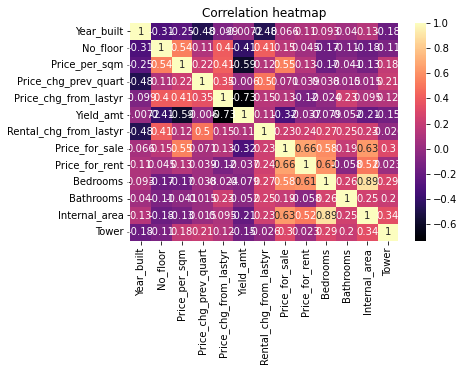

In [39]:
#Correlation heatmap (Stroke & No stroke)
# Create a correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Generate the heatmap
graph = sns.heatmap(corr_matrix,cmap='magma', annot=True)
graph.set_title('Correlation heatmap')

# Show the plot
plt.show()

## Classify data into X,y

In [40]:
#Feature from existing thesis
X = df[['Year_built', 'No_floor', 'Price_chg_prev_quart', 'Price_chg_from_lastyr', 'Yield_amt', 'Rental_chg_from_lastyr']]
y = df[['Price_per_sqm']]

In [41]:
#Add more features to new thesis
X = df[[ 'Year_built', 'No_floor', 'Price_chg_prev_quart', 'Price_chg_from_lastyr', 'Yield_amt', 
         'Rental_chg_from_lastyr', 'Price_for_sale', 'Price_for_rent', 'Bedrooms', 'Bathrooms',
         'Internal_area', 'Tower']] 
y = df[['Price_per_sqm']]

In [294]:
#Add only significant feature
X = df[[ 'Price_for_sale', 'No_floor', 'Price_for_rent', 'Price_chg_from_lastyr', 'Price_chg_prev_quart']] 
y = df[['Price_per_sqm']]

In [42]:
columnX = ['Year_built', 'No_floor', 'Price_chg_prev_quart', 'Price_chg_from_lastyr', 'Yield_amt', 
         'Rental_chg_from_lastyr', 'Price_for_sale', 'Price_for_rent', 'Bedrooms', 'Bathrooms',
         'Internal_area', 'Tower']

In [43]:
columnY = ['Price_per_sqm']

In [44]:
X

,Year_built,No_floor,Price_chg_prev_quart,Price_chg_from_lastyr,Yield_amt,Rental_chg_from_lastyr,Price_for_sale,Price_for_rent,Bedrooms,Bathrooms,Internal_area,Tower
0,2016.0,28,0.00,-0.23,4.43,1.86,12300000,35000.0,2,1,65.00,1
1,2019.0,30,0.00,-1.98,4.38,-2.40,2771000,0.0,1,1,27.00,1
2,2018.0,32,0.00,-0.09,4.51,-1.68,8500000,30000.0,1,1,38.00,1
3,2013.0,17,1.40,8.71,3.69,-17.04,6299999,0.0,1,1,47.00,3
4,2018.0,34,0.00,6.03,4.52,0.91,4590000,0.0,1,1,35.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...
984,0.0,51,9.25,4.46,4.55,20.11,5800000,0.0,1,1,27.00,2
985,2019.0,33,0.00,6.39,3.30,-3.33,4750000,0.0,2,1,44.73,1
986,2010.0,23,0.00,9.43,4.43,8.84,8900000,0.0,2,22,75.18,2
987,2017.0,30,0.00,7.31,3.78,-9.38,3090000,0.0,1,1,30.49,1


In [45]:
y

,Price_per_sqm
0,192794.0
1,111577.0
2,217476.0
3,132983.0
4,147375.0
...,...
984,241210.0
985,126499.0
986,126760.0
987,110605.0


## Divide into training and testing data

In [46]:
#Prepare training 80% and testing data 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Develop model

### Linear Regression

In [48]:
#Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [49]:
predictions=model.predict(X_train)

In [50]:
predictions=model.predict(X_test)

In [51]:
model.coef_

array([[-1.55230987e+01, -2.76577795e+02,  9.24293259e+02,
        -6.40809940e+02, -1.94318094e+04,  1.44584644e+03,
         2.10305092e-02, -7.09520634e-01, -3.29969547e+03,
        -1.96484505e+03, -1.78843498e+03,  9.39196259e+03]])

In [52]:
model.intercept_

array([221688.84507063])

In [53]:
import math
MSE = np.square(np.subtract(y_test,predictions)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

15790.570575416481


In [54]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.9563058369206551
Test Score: 0.9507630282033624


### Decision Tree

In [55]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor 
model=DecisionTreeRegressor(random_state = 42, max_depth=5)
tree_clf = model.fit(X_train,y_train)

In [56]:
predictions=model.predict(X_train)

In [57]:
predictions=model.predict(X_test)

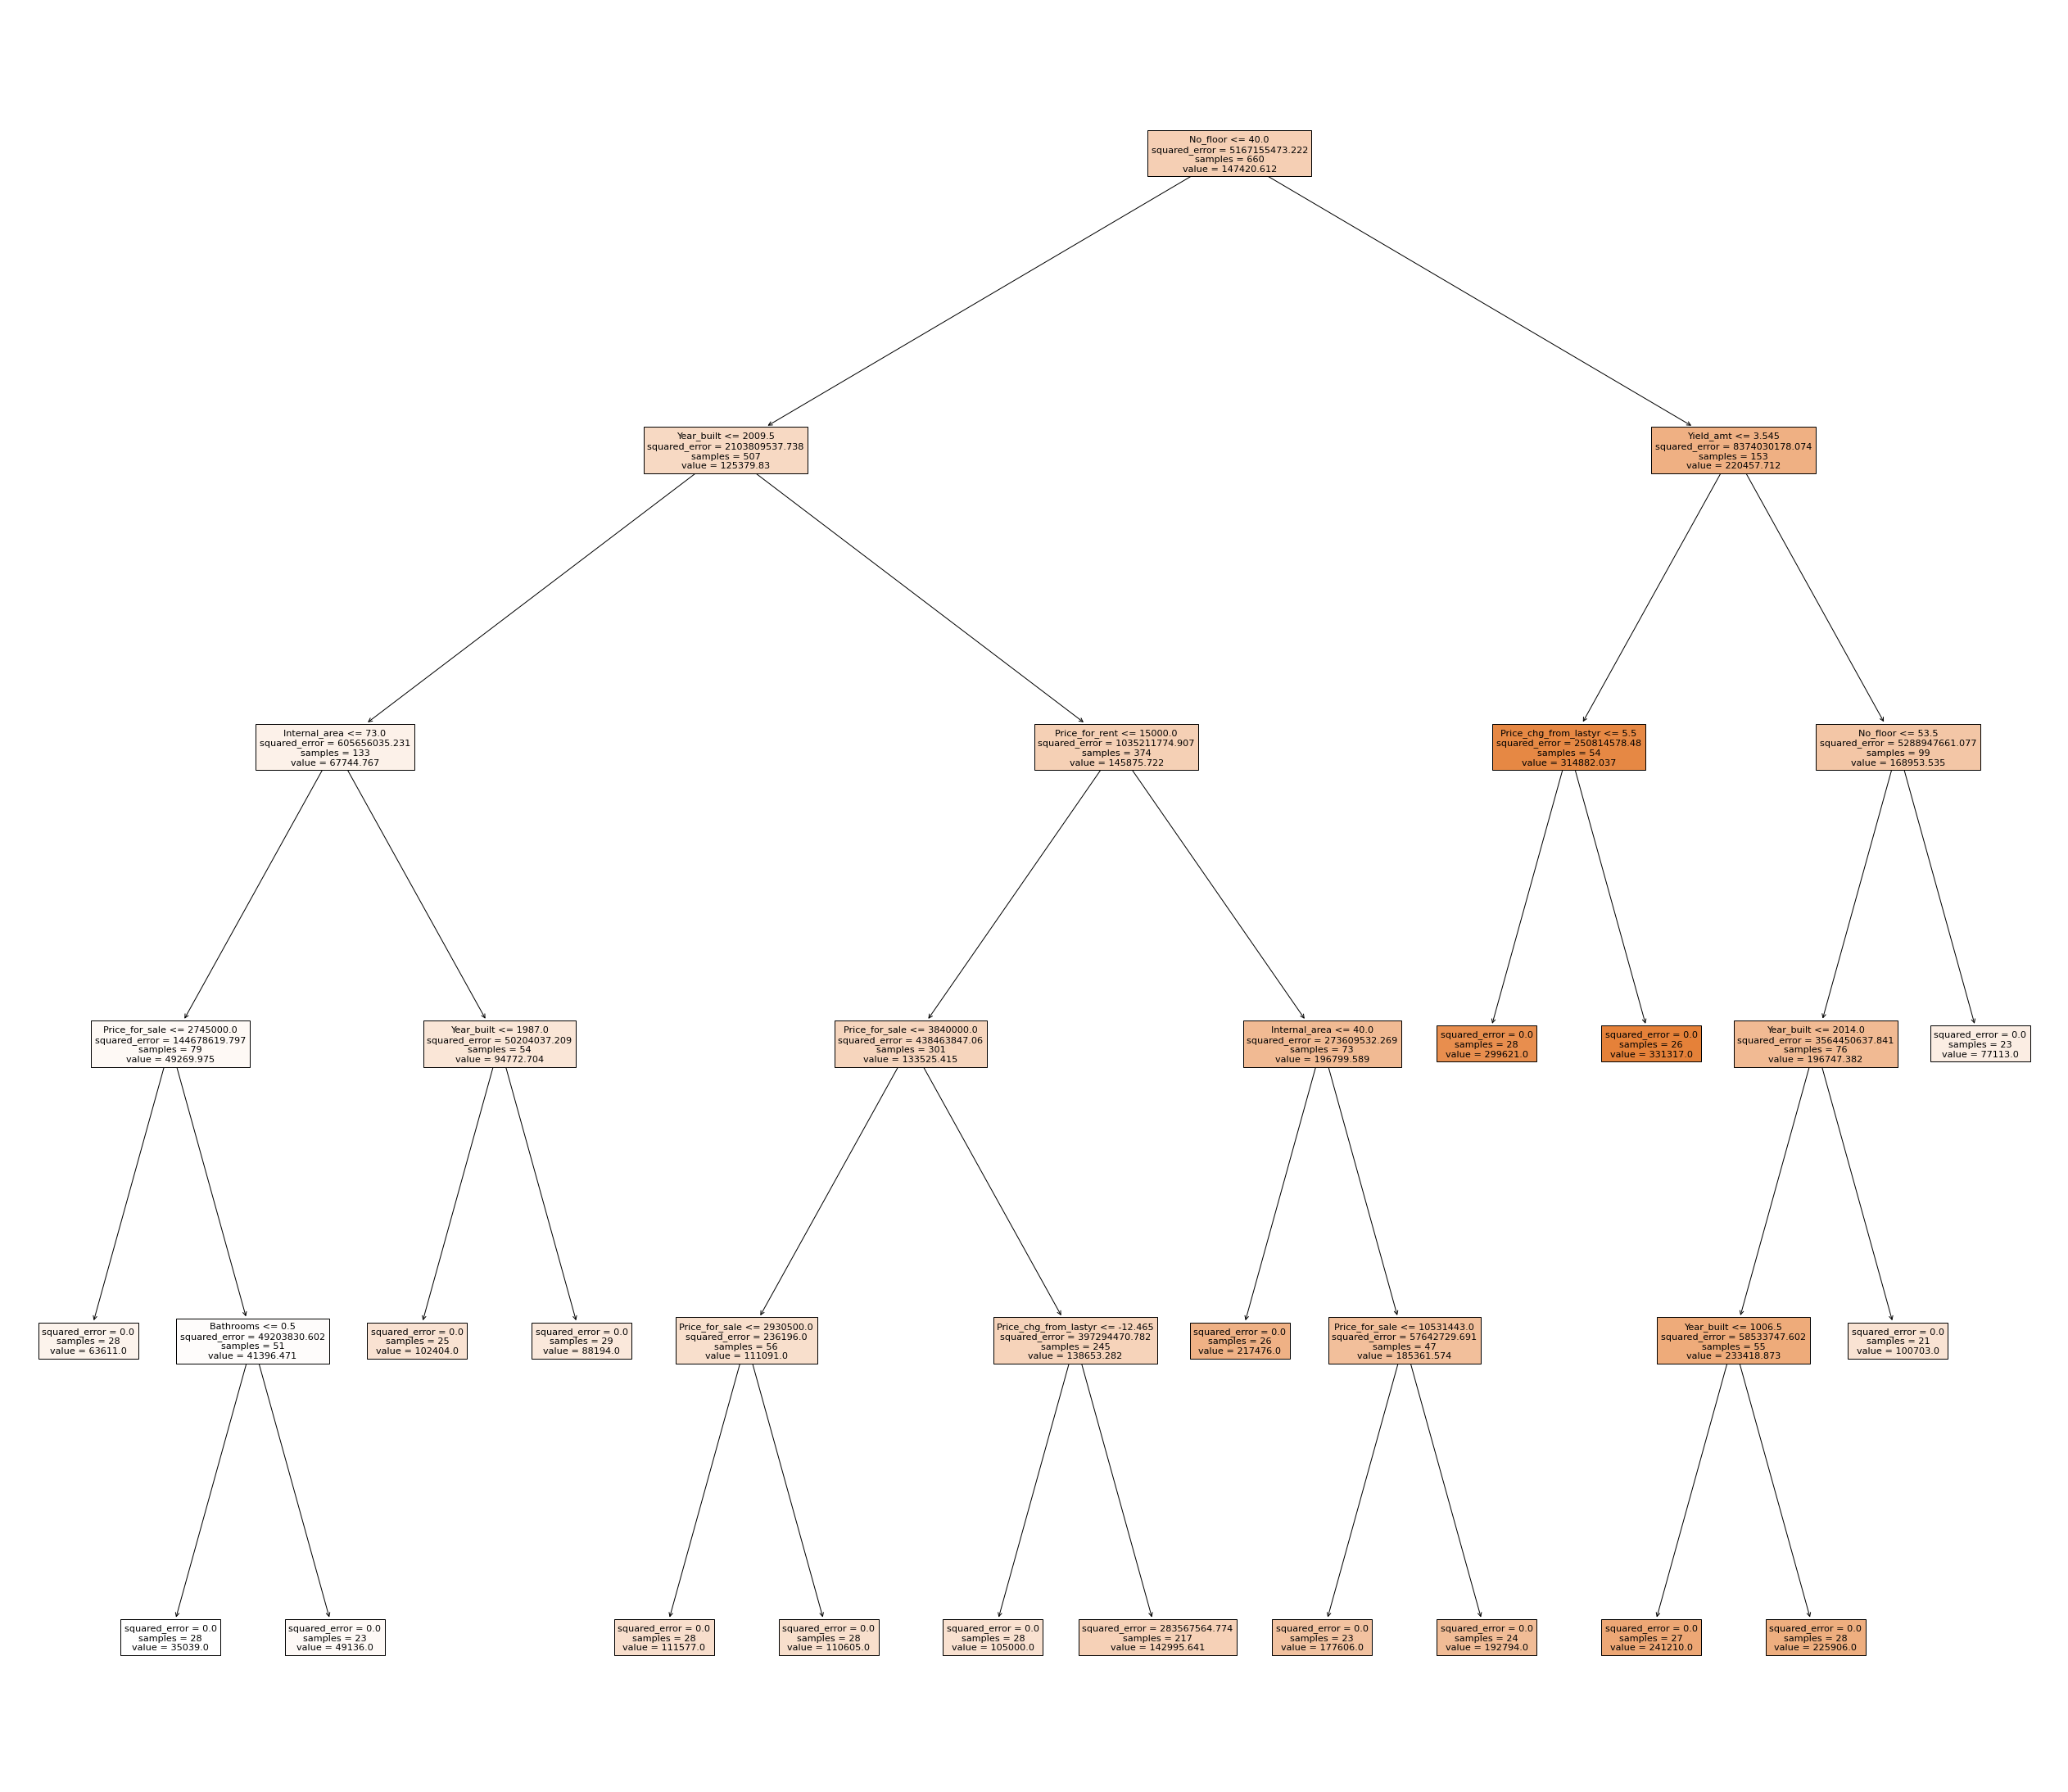

In [59]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(45,40))
_ = tree.plot_tree(model, 
                   feature_names = columnX,
                   class_names=columnY,
                   max_depth=5,
                   filled=True)

In [63]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.9819564983871185
Test Score: 0.9818732417624787


In [64]:
from sklearn import tree

text_representation = tree.export_text(model, feature_names=columnX)
print(text_representation)

|--- No_floor <= 40.00
|   |--- Year_built <= 2009.50
|   |   |--- Internal_area <= 73.00
|   |   |   |--- Price_for_sale <= 2745000.00
|   |   |   |   |--- value: [63611.00]
|   |   |   |--- Price_for_sale >  2745000.00
|   |   |   |   |--- Bathrooms <= 0.50
|   |   |   |   |   |--- value: [35039.00]
|   |   |   |   |--- Bathrooms >  0.50
|   |   |   |   |   |--- value: [49136.00]
|   |   |--- Internal_area >  73.00
|   |   |   |--- Year_built <= 1987.00
|   |   |   |   |--- value: [102404.00]
|   |   |   |--- Year_built >  1987.00
|   |   |   |   |--- value: [88194.00]
|   |--- Year_built >  2009.50
|   |   |--- Price_for_rent <= 15000.00
|   |   |   |--- Price_for_sale <= 3840000.00
|   |   |   |   |--- Price_for_sale <= 2930500.00
|   |   |   |   |   |--- value: [111577.00]
|   |   |   |   |--- Price_for_sale >  2930500.00
|   |   |   |   |   |--- value: [110605.00]
|   |   |   |--- Price_for_sale >  3840000.00
|   |   |   |   |--- Price_chg_from_lastyr <= -12.46
|   |   |   |   | 

### Random Forest 

In [65]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

C:\Users\TEEM\AppData\Local\Temp\ipykernel_16516\1855098467.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestRegressor()

In [66]:
predictions=model.predict(X_train)

In [67]:
predictions=model.predict(X_test)

In [70]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 1.0
Test Score: 1.0


In [71]:
len(model.estimators_)

100

In [73]:
model.estimators_[0].tree_.max_depth

8

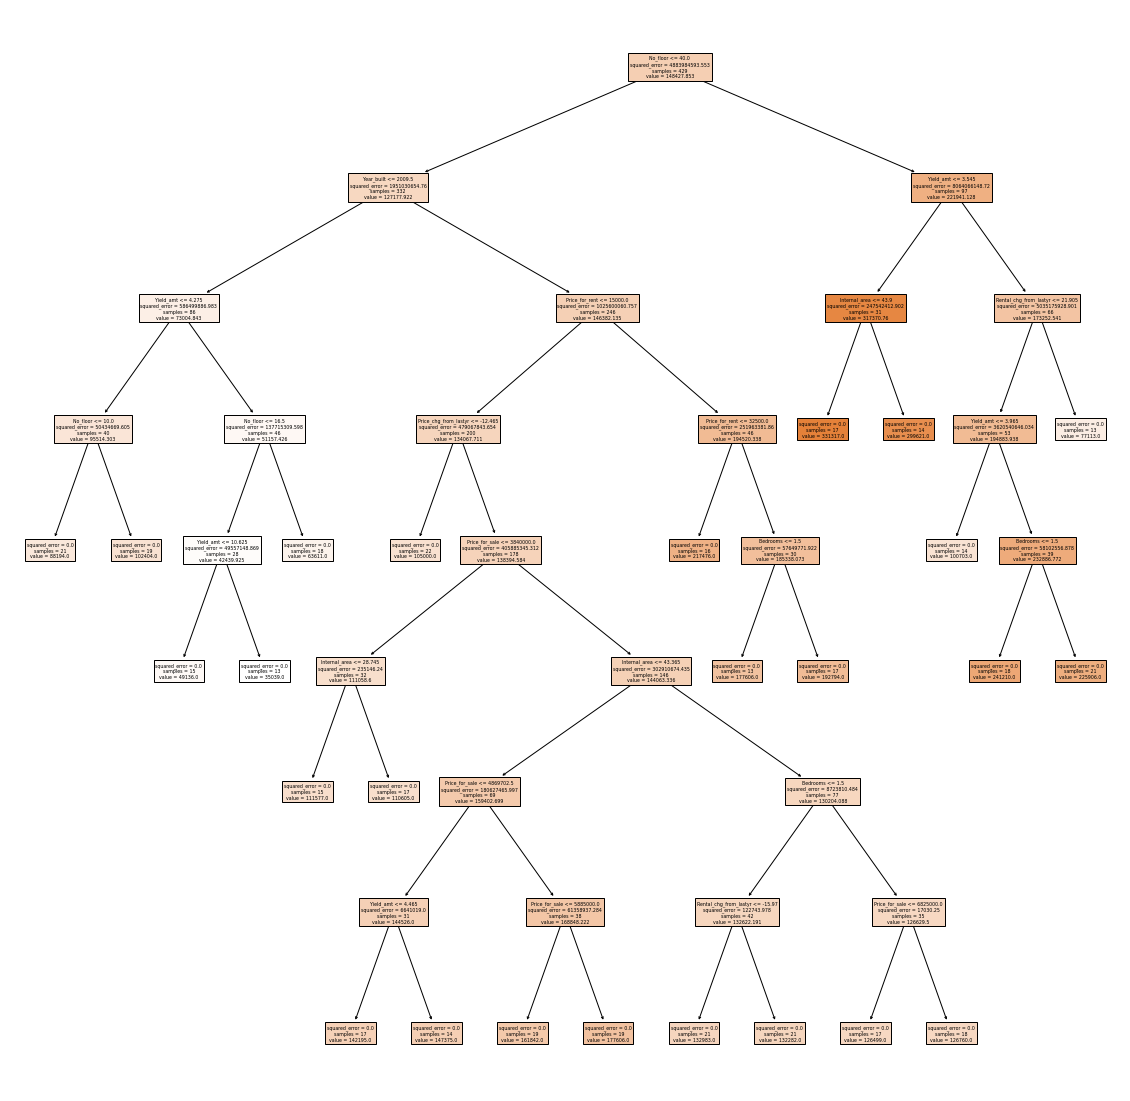

In [74]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(model.estimators_[2], feature_names=columnX, filled=True)

In [75]:
fig.savefig("random forest tree.png")

### Gradiant Booster

In [79]:
#Gradiant booster
from sklearn.ensemble import GradientBoostingRegressor

gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

model = GradientBoostingRegressor(**gbr_params)
model.fit(X_train,y_train)

C:\Users\TEEM\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TEEM\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(learning_rate=0.01, loss='ls', min_samples_split=5,
                          n_estimators=1000)

In [80]:
predictions=model.predict(X_train)

In [81]:
predictions=model.predict(X_test)

In [84]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.9999945423479978
Test Score: 0.9999928041430657


In [ ]:
plt.figure(figsize=(12,6))
plt.title('Gradient Boosting model')
plt.scatter(x_feature, y_label)
plt.plot(x_feature, gradient_boosting_regressor_model.predict(x_feature), color='black')
plt.show()